- reinforcement learning : agent와 환경의 상호작용을 통해 학습
  - 행동을 취하고 그에 따른 보상을 받으며 학습

# 밴디트 문제 (multi-armed bandit problem)
  : bandit = slot machine. 목표는 코인을 최대한 많이 얻는 것!
  - 무작위성에 현혹되지 않게 '기댓값'을 기준으로 평가
1. 만약 각 슬롯머신의 가치(보상 기댓값)을 알면 플레이어는 가장 좋은 슬롯 머신을 고를 수 있음.
2. 하지만 실제로는 각 슬롯머신의 가치를 모름.
3. 따라서 각 슬롯머신을 돌려보며 가치를 추정(가능한 정확하게)해야 함.

In [2]:
# 평균을 구하는 코드
import numpy as np

np.random.seed(0) # 0.0 이상 1.0 미만의 무작위 수 생성
rewards = []

for n in range(1, 11): #플레이어가 늘 수록 n개의 합을 구하는 sum 코드의 실행비용 증가
    reward = np.random.rand()
    rewards.append(reward)
    
    Q = sum(rewards) / n
    print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571295
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


In [3]:
# 표본 평균 구하기2
Q = 0

for n in range(1, 11):
    reward = np.random.rand()
    Q = Q + (reward - Q) / n
    print(Q)

0.7917250380826646
0.6603099789177845
0.6295548396431672
0.7035652893055406
0.5770594430840099
0.49540441918693173
0.4275207017945595
0.4781580947637318
0.5114912787844116
0.5473433657306523


- 플레이어는 가치 추정치가 가장 높은 머신을 선택해야 함 (greedy policy)
  - exploitation : 지금까지 실제로 플레이 한 결과를 바탕으로 가장 좋다고 생각되는 슬롯 머신을 플레이 (greedy)
  - exploration : 다양한 슬롯머신 시도

- 엡실론 탐욕정책
  - epsilon 의 확률로 '탐색', 1-epsilon 의 확률로 '활용(탐욕)'

In [4]:
# bendit slot machine

import numpy as np

class Bandit:
    def __init__(self, arms = 10): # arms = 슬롯머신의 개수
        self.rates = np.random.rand(arms) # 각 슬롯머신의 승률
        
    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [5]:
bandit = Bandit()

for i in range(3):
    print(bandit.play(0))

1
1
1


In [6]:
# agent 구현

Q = 0
for n in range(1, 11):
    reward = bandit.play(0) # 0번 슬롯머신을 플레이
    Q = Q + (reward - Q) / n
    print(Q)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [7]:
# 10대 슬롯머신에 대한 가치 추정치(Q) 구하기
Qs  = np.zeros(10) # 각 슬롯머신의 가치 추정치
ns = np.zeros(10) # 각 슬롯머신의 시도 횟수

for n in range(10):
    action = np.random.randint(0, 10)
    reward = bandit.play(action)
    
    ns[action] += 1 # 플레이 횟수 count
    Qs[action] += (reward - Qs[action]) / ns[action]
    print(Qs)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
[0.  0.  1.  1.  0.  0.  0.  0.  0.  0.5]
[0.  0.  1.  1.  0.  0.  0.  0.  0.  0.5]
[0.  0.  1.  1.  0.  0.  0.  0.  0.  0.5]
[0.  0.  1.  1.  0.  0.  0.  0.  0.  0.5]
[0.  0.  1.  1.  0.  0.  0.  0.  0.  0.5]
[0.  0.  1.  1.  0.  0.  0.  1.  0.  0.5]


In [8]:
print(ns)

[0. 0. 1. 1. 4. 0. 1. 1. 0. 2.]


### Agent class 구현

In [9]:
### agent class ###

class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)
        
    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]
        
    def get_action(self): # 행동 선택(greedy)
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs)) # 탐색
        return np.argmax(self.Qs) # greedy

### Bandit 프로세스 실행

In [10]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action) # 플레이 후 보상
    agent.update(action, reward)
    total_reward += reward
    
    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))
    
print(total_reward)

932


### reward 그래프

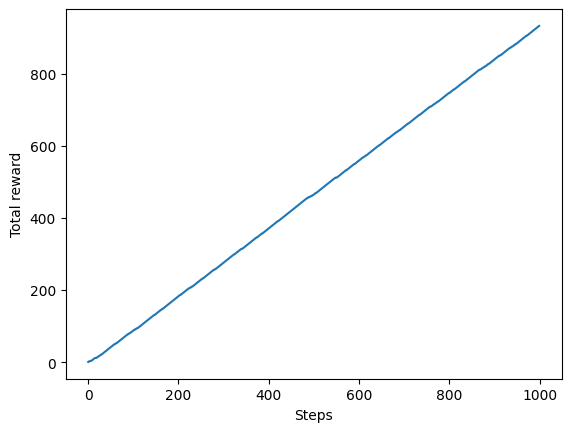

In [11]:
# reward 그래프
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()


### 단계별 승률


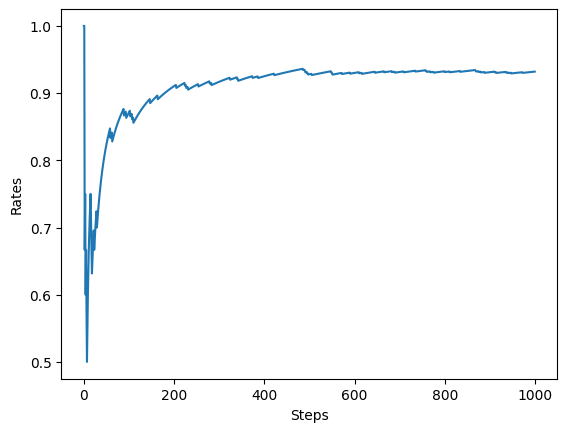

In [12]:
# 단계별 승률
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

### 실험횟수 증가하여 평균내기

In [13]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps)) #형상 배열

for run in range(runs):
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []
    
    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action) # 플레이 후 보상
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (step + 1))
        
        
    all_rates[run] = rates
    
avg_rates = np.average(all_rates, axis=0) # 각 단계의 평균 저장


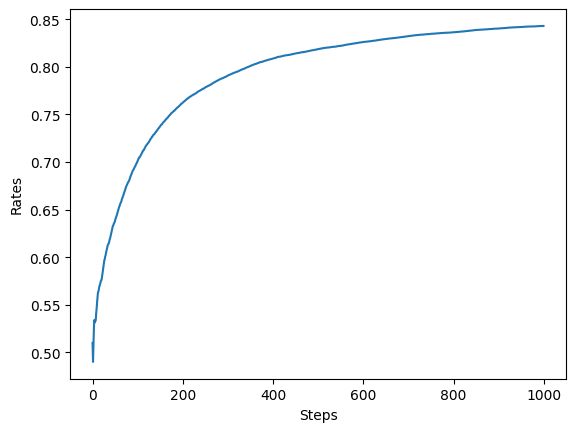

In [14]:
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

엡실론의 값을 다양히 시도해보면 최적의 엡실론 값을 찾을 수 있음.

## self rate가 플레이때마다 달라진다면? (Non-stationary Bandit)

In [ ]:
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)
        
    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms) #노이즈 추가
        if rate > np.random.rand():
            return 1
        else:
            return 0

- 비정상 문제에서는 시간이 흐르면 환경이 변하기 때문에 과거 데이터의 중요도는 점점 낮아지고, 새로운 보상의 가중치는 점점 커져야 함
- 행동 가치 추정치를 갱신하는 식에서 과거 보상의 가중치를 줄이는 방법을 추가해야 함. -> 지수이동 평균

In [15]:
class AlphaAgent:
    def __init__(self, epsilon, alpha, actions = 10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha
        
    def update(self, action, reward):
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha
        
    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)